In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Para todos los ejercicios usaremos una base de datos de diamantes. 
# Las columnas 'x', 'y' y 'z' son el tamaño del diamante.

# Con esta función se pude cargar la base de datos antes de cada ejercicio, para que un ejercicio 
# no afecte al resto

def get_dataset():
    return pd.read_csv('data/diamonds.csv')
    # return pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
    
diamonds = get_dataset()
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [3]:
# 1. Imprima las primeras 5 filas
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# 2. Imprima las primeras 5 filas, pero solamente las columnas carat, cut y price
diamonds[['carat', 'cut', 'price']].head(5)

,carat,cut,price
0,0.23,Ideal,326
1,0.21,Premium,326
2,0.23,Good,327
3,0.29,Premium,334
4,0.31,Good,335


In [5]:
# 3. Seleccione e imprima una serie
diamonds['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

In [6]:
# 4. Cree una nueva serie formada por 'cut' y 'color', separados por un guion
diamonds['cut'] + '-' + diamonds['color']

0            Ideal-E
1          Premium-E
2             Good-E
3          Premium-I
4             Good-J
            ...     
53935        Ideal-D
53936         Good-D
53937    Very Good-D
53938      Premium-H
53939        Ideal-D
Length: 53940, dtype: object

In [7]:
# 5. Adicione la serie anterios al dataframe diamonds como Quality-color
diamonds['Quality-color'] = diamonds['cut'] + '-' + diamonds['color']
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-color
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal-E
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium-E
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good-E
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium-I
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good-J


In [8]:
# 6. Muestre la cantidad de filas y columnas de diamonds. Muestre el tipo de cada columna
print(diamonds.shape)
print(diamonds.dtypes)

(53940, 11)
carat            float64
cut               object
color             object
clarity           object
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
Quality-color     object
dtype: object


In [9]:
# 7. Muestre la descripcion de las columnas que son objetos
print(diamonds.describe(include=['object']))

          cut  color clarity Quality-color
count   53940  53940   53940         53940
unique      5      7       8            35
top     Ideal      G     SI1       Ideal-G
freq    21551  11292   13065          4884


In [144]:
# 8. Renombre dos columnas del dataframe
diamonds = get_dataset()
diamonds.rename(columns={'cut':'corte', 'clarity': "claridad"}, inplace=True)
diamonds.head(5)

,carat,corte,color,claridad,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [145]:
# 9. Elimine la columna 'cut'
diamonds = get_dataset()
diamonds.drop(['cut'], axis=1).head(5)

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [146]:
# 10. Elimine 3 columnas
diamonds = get_dataset()
diamonds.drop(['cut', 'clarity', 'table'], axis=1).head(4)

,carat,color,depth,price,x,y,z
0,0.23,E,61.5,326,3.95,3.98,2.43
1,0.21,E,59.8,326,3.89,3.84,2.31
2,0.23,E,56.9,327,4.05,4.07,2.31
3,0.29,I,62.4,334,4.20,4.23,2.63


In [147]:
# 11. Elimine las filas de la 0 a la 29
diamonds = get_dataset()
diamonds.drop(range(30), axis=0).head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
30,0.23,Very Good,F,VS1,60.0,57.0,402,4.00,4.03,2.41
31,0.23,Very Good,F,VS1,59.8,57.0,402,4.04,4.06,2.42
32,0.23,Very Good,E,VS1,60.7,59.0,402,3.97,4.01,2.42
33,0.23,Very Good,E,VS1,59.5,58.0,402,4.01,4.06,2.40


In [148]:
# 12. Ordene la serie asociada a 'cut' en orden ascencente. Retorne una serie.
diamonds = get_dataset()
diamonds['cut'].sort_values(ascending=True)


3850          Fair
51464         Fair
51466         Fair
10237         Fair
10760         Fair
           ...    
7402     Very Good
43101    Very Good
16893    Very Good
16898    Very Good
21164    Very Good
Name: cut, Length: 53940, dtype: object

In [149]:
# 13. Ordene la serie asociada con 'price' en orden descendente. Retorne una serie
diamonds['price'].sort_values(ascending=False)

27749    18823
27748    18818
27747    18806
27746    18804
27745    18803
         ...  
4          335
3          334
2          327
1          326
0          326
Name: price, Length: 53940, dtype: int64

In [150]:
# 14. Ordene toda la base de datos por 'carat' de forma ascencente
diamonds.sort_values(['carat'])

,carat,cut,color,clarity,depth,table,price,x,y,z
31593,0.20,Premium,E,VS2,61.1,59.0,367,3.81,3.78,2.32
31597,0.20,Ideal,D,VS2,61.5,57.0,367,3.81,3.77,2.33
31596,0.20,Premium,F,VS2,62.6,59.0,367,3.73,3.71,2.33
31595,0.20,Ideal,E,VS2,59.7,55.0,367,3.86,3.84,2.30
31594,0.20,Premium,E,VS2,59.7,62.0,367,3.84,3.80,2.28
...,...,...,...,...,...,...,...,...,...,...
25999,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24
25998,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17
27130,4.13,Fair,H,I1,64.8,61.0,17329,10.00,9.85,6.43
27630,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.72


In [151]:
# 15. Seleccione las filas con carat de al menos 0.3
diamonds[diamonds.carat >= 0.3].head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68


In [153]:
# 16. Obtenga una nueva serie con la suma x+y+z. Correlacionela con depth y price
diamonds['suma'] = diamonds.x+diamonds.y+diamonds.z
diamonds[['suma', 'depth', 'price']].corr()


,suma,depth,price
suma,1.000000,0.001739,0.881078
depth,0.001739,1.000000,-0.010647
price,0.881078,-0.010647,1.000000


In [154]:
# 17. Seleccione los diamantes con x>5, y>5 and z>5
diamonds[(diamonds.x > 5) & (diamonds.y > 5) & (diamonds.z > 5)].head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,suma
11778,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12,19.74
13002,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36,20.80
13118,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23,21.19
13562,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04,20.19
13757,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36,21.42


In [156]:
# 18. Mueste los diamantes que son Premium o Ideal
diamonds[(diamonds.cut == 'Premium') | (diamonds.cut == 'Ideal')].head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,suma
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,10.36
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,10.04
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,11.06
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46,10.29
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,10.05


In [157]:
# otra solucion
diamonds[diamonds.cut.isin({'Premium', 'Ideal'})].head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,suma
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,10.36
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,10.04
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,11.06
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46,10.29
12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,10.05


In [42]:
# 19. Muestre los diamantes que son Fair, Good o Premium
diamonds[diamonds.cut.isin({'Fair', 'Good', 'Premium'})].head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49


In [44]:
# 20. Construya una cadena de caracteres con todos los nombres de las columnas, separados por coma
", ".join(d for d in diamonds.columns)

'carat, cut, color, clarity, depth, table, price, x, y, z'

In [48]:
# 21. Similar al anterior, pero deben estar entre comillas, y el ultimo separador debe ser 'y'
comps = [f'"{d}"' for d in diamonds.columns]
", ".join(comps[:-1]) + ' y ' + comps[-1]

'"carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y" y "z"'

In [53]:
# 22. Itere por las primeras 10 filas de la base de datos, imprimiendo sus valores separados
# por ->
count = 0
for _, r in diamonds.iterrows():
    print(",".join(str(a) for a in r))
    count += 1
    if count == 10:
        break

0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.2,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
0.23,Very Good,H,VS1,59.4,61.0,338,4.0,4.05,2.39


In [163]:
# 23. Elimine todas las columnas no numéricas. 
diamonds = get_dataset()
print(diamonds.dtypes)
non_numerics = [d for d in diamonds.dtypes.index  
                if diamonds.dtypes[d] != np.float64 and 
               diamonds.dtypes[d] != np.int64]
diamonds.drop(non_numerics, axis=1).head(5)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [158]:
# otra solucion, mas simple
diamonds.select_dtypes(['number']).head(5)

,carat,depth,table,price,x,y,z,suma
0,0.23,61.5,55.0,326,3.95,3.98,2.43,10.36
1,0.21,59.8,61.0,326,3.89,3.84,2.31,10.04
2,0.23,56.9,65.0,327,4.05,4.07,2.31,10.43
3,0.29,62.4,58.0,334,4.20,4.23,2.63,11.06
4,0.31,63.3,58.0,335,4.34,4.35,2.75,11.44


In [164]:
# 24. Calcule la media de cada columna numerica
diamonds.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [165]:
# 25. Calcule le media de cada fila (lo que no tiene mucho sentido ...)
diamonds.mean(axis=1)

0         64.727143
1         65.292857
2         65.651429
3         66.535714
4         66.864286
            ...    
53935    412.932857
53936    412.981429
53937    413.628571
53938    413.267143
53939    412.898571
Length: 53940, dtype: float64

In [166]:
# 26. Calcule la cantidad de valores, el minimo, y el maximo precio por cada valor de 'cut' 
diamonds.groupby("cut")['price'].describe()[['count', 'min', 'max']]

,count,min,max
cut,,,
Fair,1610.0,337.0,18574.0
Good,4906.0,327.0,18788.0
Ideal,21551.0,326.0,18806.0
Premium,13791.0,326.0,18823.0
Very Good,12082.0,336.0,18818.0


In [168]:
# 27. Obtenga una serie con cuantes veces aparece cada valor de 'cut'
diamonds.groupby('cut')['carat'].count()

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: carat, dtype: int64

In [169]:
# 28. Calcule el porcentaje que aparecen los valores de 'cut'
counts = diamonds.groupby('cut')['carat'].count()
counts / sum(counts) * 100

cut
Fair          2.984798
Good          9.095291
Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Name: carat, dtype: float64

In [127]:
# Una mas simple
print(diamonds.cut.value_counts(normalize=True) * 100)

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64


In [170]:
# 29. Muestre los valores diferentes de 'cut'
diamonds.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

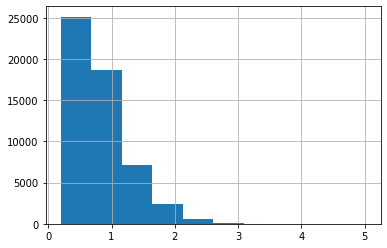

In [171]:
# 30. Muestre un histograma de los valores de 'carat' 
diamonds.carat.hist()
plt.show()

<AxesSubplot:>

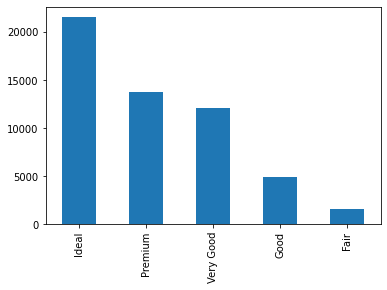

In [172]:
# 31. Muestre un grafico de barras con la cantidad de cada valor diferente de 'cut'
diamonds.cut.value_counts().plot(kind="bar")

## Un poco de investigacion
En la base de datos de diamantes investigue:
1. Que factores son los que mas afectan el precio
2. Podria construir un modelo para predecir el precio de un nuevo diamante, dadas sus otras caracteristicas? Mientras menos atributos, mejor!

In [176]:
diamonds = get_dataset()
diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
